In [25]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt

# 数据加载

In [9]:
email_info = pd.read_csv('./Emails.csv')
aliases_info = pd.read_csv('./Aliases.csv')
person_info = pd.read_csv('./Persons.csv')

In [10]:
aliases = {}
for index,row in aliases_info.iterrows():
    aliases[row['Alias']] = row['PersonId']
    
persons = {}
for index,row in person_info.iterrows():
    persons[row['Id']] = row['Name']
persons

{1: '111th Congress',
 2: 'AGNA USEMB Kabul Afghanistan',
 3: 'AP',
 4: 'ASUNCION',
 5: 'Alec',
 6: 'Alex Dupuy',
 7: 'American Beverage Association',
 8: 'Andrew Mayock',
 9: 'Andrew Shapiro',
 10: 'Anne-Marie Slaughter',
 11: 'Anthony Lake',
 12: 'Arturo Valenzuela',
 13: 'Ban Ki-moon',
 14: 'Barack Obama',
 15: 'Barbara Mikulski',
 16: 'Betsy Ebeling',
 17: 'Bill Clinton',
 18: 'Biography',
 19: 'Bonnie Klehr',
 20: 'Brian Greenspun',
 21: 'Burns Strider',
 22: 'Capricia Marshall',
 23: 'Carlos Pascual',
 24: 'Caroline Adler',
 25: 'Case Button',
 26: 'Cecile Richards',
 27: 'Chad Weston',
 28: 'Charles Kiamie',
 29: 'Chelsea Clinton',
 30: 'Cherie Blair',
 31: 'Cheryl',
 32: 'Cheryl Mills',
 33: 'Chester Crocker',
 34: 'Christopher Butzgy',
 35: 'Christopher Edwards',
 36: 'Christopher Green',
 37: 'Christopher Hill',
 38: 'Claire Coleman',
 39: 'Colin Powell',
 40: 'Council on Foreign Relations',
 41: 'Courtney Beale',
 42: 'Craig Kelly',
 43: 'Daily Sun',
 44: 'Dana Hyde',
 45: '

In [11]:
aliases

{'111th congress': 1,
 'agna usemb kabul afghanistan': 2,
 'ap': 3,
 'asuncion': 4,
 'alec': 5,
 'dupuy alex': 6,
 'american beverage association': 7,
 'mayock andrew': 8,
 'shapiro andrew j': 9,
 'shapiroa@state.gov': 9,
 'slaughter annmarie': 10,
 'slaughter anne marie': 10,
 'slaughter annemarie': 10,
 'slaughtera@state.gov': 10,
 'lake anthony': 11,
 'valenzuela arturo a': 12,
 'valenzuelaaa@state.gov': 12,
 'kimoon ban': 13,
 'obama barack': 14,
 'president': 14,
 'bam@mikulski.senate.gov': 15,
 'mikulski bam': 15,
 'mikulski bam (mikulski)': 15,
 'mikulski bam (mitkulski)': 15,
 'mikulskibam (mikulski)': 15,
 'betsy.ebeling': 16,
 'ebeling betsy': 16,
 'betsyebeling': 16,
 'betsyebeling1050': 16,
 'clinton william j': 17,
 'dad': 17,
 'biography': 18,
 'klehr bonnie': 19,
 'brian': 20,
 'bstrider': 21,
 'strider burns': 21,
 'capricia marshall': 22,
 'marshall capricia': 22,
 'marshall capricia p': 22,
 'capriciamarshall': 22,
 'capriciamarshall@': 22,
 'cmarshall': 22,
 'marshal

# 定义函数

In [12]:
# 针对别名进行转换
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉，和@后面的内容
    name = name.replace(',','').split('@')[0]
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

In [38]:
# 画网络图
def show_graph(graph, type = 'spring_layout'):
    if type == 'spring_layout':
        # 使用Spring Layout布局，类似中心放射状
        positions=nx.spring_layout(graph)
    if type == 'circular_layout':
        # 使用Circular Layout布局，在一个圆环上均匀分布
        positions=nx.circular_layout(graph)

    # 设置网络图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()

# 数据处理

In [13]:
email_info.MetadataTo = email_info['MetadataTo'].apply(unify_name) 
email_info.MetadataFrom = email_info.MetadataFrom.apply(unify_name)

# 构建有向图

In [17]:
# 设置每条边的权重为邮件往来次数
email_weights = defaultdict(list)
for temp in zip(email_info.MetadataFrom,email_info.MetadataTo):
    if temp not in email_weights:
        email_weights[temp] = 1
    else:
        email_weights[temp] += 1
print(email_weights)

defaultdict(<class 'list'>, {('Jake Sullivan', 'Hillary Clinton'): 815, ('nan', 'Hillary Clinton'): 20, ('Cheryl Mills', ';h'): 1, ('Cheryl Mills', 'Hillary Clinton'): 1182, ('Hillary Clinton', 'Huma Abedin'): 32, ('Hillary Clinton', 'russorv'): 26, ('slaughter anne-marie', 'Hillary Clinton'): 126, ('Harold Hongju Koh', 'Hillary Clinton'): 12, ('Wendy Sherman', 'Hillary Clinton'): 7, ('Jake Sullivan', 'Wendy Sherman'): 1, ('Hillary Clinton', 'sullivanjj'): 288, ('Sidney Blumenthal', 'Hillary Clinton'): 361, ('Burns Strider', 'Hillary Clinton'): 2, ('Huma Abedin', 'Hillary Clinton'): 1322, ('Cheryl Mills', 'Cheryl Mills'): 17, ('Robert Russo', 'Hillary Clinton'): 22, ('Capricia Marshall', 'Cheryl Mills'): 2, ('Hillary Clinton', 'Oscar Flores'): 5, ('William Burns', 'Hillary Clinton'): 10, ('Monica Hanley', 'Hillary Clinton'): 24, ('Hillary Clinton', 'abedinh'): 345, ('Hillary Clinton', 'millscd'): 298, ('Daniel Schwerin', 'Hillary Clinton'): 9, ('Hillary Clinton', 'hanleymr'): 33, ('Mon

In [20]:
# 有权重的有向边
# 转化格式 (from, to), weight => from, to, weight
weighted_edge = [(key[0],key[1],w) for key,w in email_weights.items()]
weighted_edge

[('Jake Sullivan', 'Hillary Clinton', 815),
 ('nan', 'Hillary Clinton', 20),
 ('Cheryl Mills', ';h', 1),
 ('Cheryl Mills', 'Hillary Clinton', 1182),
 ('Hillary Clinton', 'Huma Abedin', 32),
 ('Hillary Clinton', 'russorv', 26),
 ('slaughter anne-marie', 'Hillary Clinton', 126),
 ('Harold Hongju Koh', 'Hillary Clinton', 12),
 ('Wendy Sherman', 'Hillary Clinton', 7),
 ('Jake Sullivan', 'Wendy Sherman', 1),
 ('Hillary Clinton', 'sullivanjj', 288),
 ('Sidney Blumenthal', 'Hillary Clinton', 361),
 ('Burns Strider', 'Hillary Clinton', 2),
 ('Huma Abedin', 'Hillary Clinton', 1322),
 ('Cheryl Mills', 'Cheryl Mills', 17),
 ('Robert Russo', 'Hillary Clinton', 22),
 ('Capricia Marshall', 'Cheryl Mills', 2),
 ('Hillary Clinton', 'Oscar Flores', 5),
 ('William Burns', 'Hillary Clinton', 10),
 ('Monica Hanley', 'Hillary Clinton', 24),
 ('Hillary Clinton', 'abedinh', 345),
 ('Hillary Clinton', 'millscd', 298),
 ('Daniel Schwerin', 'Hillary Clinton', 9),
 ('Hillary Clinton', 'hanleymr', 33),
 ('Monica 

In [22]:
# 构建有向图
graph = nx.DiGraph()
# 添加边，设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(weighted_edge)

In [23]:
# 计算每个人/节点的pr值
pagerank = nx.pagerank(graph)
pagerank

{'Jake Sullivan': 0.005791704166582624,
 'Hillary Clinton': 0.30625575336382416,
 'nan': 0.13999227061446815,
 'Cheryl Mills': 0.009358382485728864,
 ';h': 0.0008967850871949974,
 'Huma Abedin': 0.010664457957706461,
 'russorv': 0.004414888802206403,
 'slaughter anne-marie': 0.001411729861610798,
 'Harold Hongju Koh': 0.0009914506387867286,
 'Wendy Sherman': 0.0011673799493548969,
 'sullivanjj': 0.040032942578700645,
 'Sidney Blumenthal': 0.007543328643239068,
 'Burns Strider': 0.0010366588039860962,
 'Robert Russo': 0.0008904426392777106,
 'Capricia Marshall': 0.0017166548334911842,
 'Oscar Flores': 0.0016529953921252999,
 'William Burns': 0.0011615538825799176,
 'Monica Hanley': 0.0008904426392777106,
 'abedinh': 0.04865794676080488,
 'millscd': 0.04143526549410853,
 'Daniel Schwerin': 0.0009243019859440611,
 'hanleymr': 0.005370314170153694,
 'Philippe Reines': 0.009023759500896596,
 'Thomas Nides': 0.0009399158462110825,
 'jilotylc': 0.03160717295021766,
 'Melanne Verveer': 0.00224

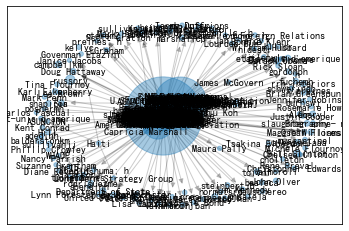

In [41]:
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph,pagerank,name = 'pagerank')
# 画网络图
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
# nx.draw(graph,with_labels = True)
# plt.show()
# for v,x in graph.nodes(data = True):
#     print(v,'---',x,'\n')
# for e in graph.edges(data=True):
#     print(e)
show_graph(graph)

# 精简图谱

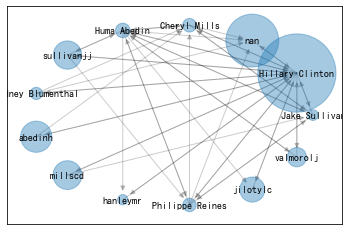

In [44]:
# 设置PR值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉PR值小于pagerank_threshold的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph, 'circular_layout')